In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pprint

In [2]:
# reading the data from the excel
datadf = pd.read_csv("./ratings_Electronics.csv", names=['userid','productid','ratings','epoch'])

In [3]:
datadf.head()

,userid,productid,ratings,epoch
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
datadf.shape

(7824482, 4)

- The timestamp column in the dataset is in epoch format, hence changing it to readable format.

In [5]:
datadf['timestamp'] = pd.to_datetime(datadf['epoch'],unit='s')

In [6]:
datadf.head()

,userid,productid,ratings,epoch,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,2012-04-18


- Now we have a timestamp column that is engineered from epoch column. This timestamp column is in human readable format.

In [7]:
indexs = datadf.columns

In [8]:
for ind in indexs:
    try:
        s = datadf[datadf[ind].isna()][ind].sum()
        print("No of empty records in {} column is {}.".format(ind, s))
    except Exception as e:
        pass

No of empty records in userid column is 0.
No of empty records in productid column is 0.
No of empty records in ratings column is 0.0.
No of empty records in epoch column is 0.


In [9]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 5 columns):
userid       object
productid    object
ratings      float64
epoch        int64
timestamp    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 298.5+ MB


- From the info function we can see that the datatypes of the columns are as expected.

In [10]:
datadf.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
userid,7824482,4201696,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productid,7824482,476002,B0074BW614,18244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ratings,7.82448e+06,NaN,NaN,NaN,NaN,NaN,4.01234,1.38091,1,3,5,5,5
epoch,7.82448e+06,NaN,NaN,NaN,NaN,NaN,1.33818e+09,6.90043e+07,9.1273e+08,1.31535e+09,1.36106e+09,1.38612e+09,1.40607e+09
timestamp,7824482,5489,2014-01-07 00:00:00,18276,1998-12-04 00:00:00,2014-07-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- From the describe function we see that:
    - The total records in the dataset is 7824482.
    - The userid has a unique users count of 4201696.
    - The product id has a unique product count of 476002.
    - The mean of all the ratings is 4.01234.

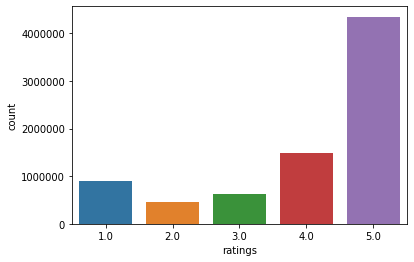

In [11]:
sns.countplot(datadf['ratings'])

- We have only one discrete data in the dataset.
- The distribution plot will not be useful on this dataset.
- On the other hand we see the countplot and we have rating 5.0 is given more than any other ratings, followed by ratings 4.0, 1.0, 3.0 and 2.0. 

#### Considering data where the users have rated 50 times or more.

In [12]:
counts = datadf['userid'].value_counts()
newdatasamp = datadf[datadf['userid'].isin(counts[counts >= 50].index)]

In [13]:
newdatasamp.shape

(125871, 5)

In [14]:
newdatasamp.head()

,userid,productid,ratings,epoch,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000,2014-01-20
118,AT09WGFUM934H,0594481813,3.0,1377907200,2013-08-31
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600,2011-10-27
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000,2010-08-14
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200,2013-07-12


## Popularity Based Recommendation System

In [15]:
ratings_mean_count = pd.DataFrame(newdatasamp.groupby('productid')['ratings'].mean())

In [16]:
ratings_mean_count['rating_counts'] = pd.DataFrame(newdatasamp.groupby('productid')['ratings'].count())

In [17]:
ratings_mean_count = ratings_mean_count.sort_values(by=['rating_counts'] ,ascending=False).reset_index()

In [18]:
ratings_mean_count.head()

,productid,ratings,rating_counts
0,B0088CJT4U,4.218447,206
1,B003ES5ZUU,4.864130,184
2,B000N99BBC,4.772455,167
3,B007WTAJTO,4.701220,164
4,B00829TIEK,4.436242,149


In [19]:
uniqueUserID = datadf['userid'].unique()

In [20]:
uniqueUserID
uniqueusers =  np.random.choice(uniqueUserID, 2 , replace=False)

In [21]:
def doPopularityRecommendation(userid):
    print('Fetching Popularity Based Recommendation for userid {}.'.format(userid))
    newdf = datadf[~datadf.isin([userid])]['productid']
    newdf = newdf.to_list()
    newrecommendation = ratings_mean_count[ratings_mean_count.isin(newdf)]
    newrecommendation = newrecommendation.sort_values(by=['rating_counts'] ,ascending=False).reset_index()
    newrecommendation = newrecommendation['productid'].head(10)
    return newrecommendation

In [22]:
for users in uniqueusers:
    print('--'*35)
    print(doPopularityRecommendation(users))
    print('--'*35)

----------------------------------------------------------------------
Fetching Popularity Based Recommendation for userid A1UWPSFAJKKAW0.
0    B0088CJT4U
1    B003ES5ZUU
2    B000N99BBC
3    B007WTAJTO
4    B00829TIEK
5    B008DWCRQW
6    B00829THK0
7    B002R5AM7C
8    B004CLYEDC
9    B002SZEOLG
Name: productid, dtype: object
----------------------------------------------------------------------
----------------------------------------------------------------------
Fetching Popularity Based Recommendation for userid AL1SFX6Z5ZUYI.
0    B0088CJT4U
1    B003ES5ZUU
2    B000N99BBC
3    B007WTAJTO
4    B00829TIEK
5    B008DWCRQW
6    B00829THK0
7    B002R5AM7C
8    B004CLYEDC
9    B002SZEOLG
Name: productid, dtype: object
----------------------------------------------------------------------


## Collaborative Filtering Recommendation System

In [23]:
df = newdatasamp.drop(columns=['epoch', 'timestamp'], axis=1)

In [24]:
from surprise import KNNWithMeans
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [25]:
newdatasamp.reset_index(drop=True, inplace=True)

In [26]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df, reader)

In [27]:
trainset, testset = train_test_split(data, test_size=.30)

In [28]:
algo = KNNWithMeans(k=75, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [29]:
test_pred = algo.test(testset)

In [30]:
test_pred[0]

Prediction(uid='A2MR696ZU17F12', iid='B00012EYNG', r_ui=2.0, est=3.425, details={'actual_k': 0, 'was_impossible': False})

In [31]:
from collections import defaultdict
 
def get_top5_recommendations(predictions, topN=5):
     
    top_recs = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_recs[uid].append((iid, est))
     
    for uid, user_ratings in top_recs.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recs[uid] = user_ratings[:topN]
     
    return top_recs

In [32]:
recommendationstop5 = get_top5_recommendations(test_pred, 5)

In [33]:
print("Printing Top 5 Recommendations for Users.")
print("--"*30)
count = 0
for recommendations in recommendationstop5.items():
    count = count + 1
    user = recommendations[0]
    rec =  recommendations[1]
    print("Recommendation for User ID {}:".format(user))
    for pid, ratings in rec:
        print("Product ID {} Rating {}".format(pid, ratings))
    print("--"*30)
    if count == 5:
        break

Printing Top 5 Recommendations for Users.
------------------------------------------------------------
Recommendation for User ID A2MR696ZU17F12:
Product ID B002EQ7UEC Rating 4.260938156147499
Product ID B007IXY472 Rating 4.260938156147499
Product ID B00009XZY5 Rating 4.260938156147499
Product ID B004C4SEH6 Rating 4.260938156147499
Product ID B001AVL9VM Rating 4.260938156147499
------------------------------------------------------------
Recommendation for User ID A3PD8JD9L4WEII:
Product ID B0089ZV1WY Rating 5
Product ID B000BQ7GW8 Rating 5
Product ID B005LMWPGY Rating 5
Product ID B00BOHNYTW Rating 5
Product ID B00CHT6CRC Rating 5
------------------------------------------------------------
Recommendation for User ID A3T7V207KRDE2O:
Product ID B0038KN3LM Rating 5
Product ID B000FIQBNW Rating 4.977990430622009
Product ID B002MCZJ78 Rating 4.852437417654809
Product ID B000L47AHG Rating 4.840744999594284
Product ID B006TF37H8 Rating 4.830637796282628
-------------------------------------

In [34]:
def recommendationSearchByUserID(userid):
    print("--"*30)
    for recommendations in recommendationstop5.items():
        user = recommendations[0]
        rec =  recommendations[1]
        if user == userid:
            print("Recommendation for User ID {}:".format(user))
            for pid, ratings in rec:
                print("Product ID {} Rating {}".format(pid, ratings))
    print("--"*30)

In [35]:
recommendationSearchByUserID('A38RMU1Y5TDP9')

------------------------------------------------------------
Recommendation for User ID A38RMU1Y5TDP9:
Product ID B001HN6CVA Rating 5
Product ID B0007NWL70 Rating 5
Product ID B00066FHHO Rating 5
Product ID B009C98NPY Rating 5
Product ID B00020S7XK Rating 4.966411666268229
------------------------------------------------------------


In [36]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.0528


1.052781429724865

## Insights From the Recommendation Systems

- We have build two recommendation systems:
    - Popularity Based Recommendation System.
    - Collabrative Filtering Recommendation System.

#### Populatity Based Recommendation System:

- This kind of recommendation system is used when a application owner is not aware of anything about the user.
- The system recommends the products that is not rated by the user and also popular in terms of high number of rating count.
- Hence we see that mostly all the users get the same 10 products recommended.
- There might be change to the product recommended only when the user the user has already rated the product.
- Popularity based recommendation system is used to build user profile, after which using the profile build we can provide better recommendation of products to the users.

#### Collaborative Filtering Recommendation System:

- We have implemented User Based Collabrative filtering using KNNMeans Algorithm.
- Collaborative Filtering works on the principle that it maps users with same traits.
- Once such mapping is done on the train data we implement the same on the test data and get the predictions.
- Using the prediction we identify what are the top 5 products that we can recommend to the user so that he would probably rate the product high.
- Likewise if we observe the recommendation for any user it is different from other user. This makes us to understand that this is based on user-a-like behaviour based recommendations.

#### Conclusion:

- Both Populatity Based and Collaborative Filtering are best when used in appropriate business use cases.
- Popularity Based Recommendation System can be stacked with Collaborative Filtering Recommendation System to achieve better results.
- When a new user comes in Popularity Based Recommendation System is used to build user profile, once the user have started to interact better and the user profile is good, the user profile data is used to recommend better product using Collaborative Filtering Recommendation System.